# INITIALIZE THE DATA

In [8]:
import os
import sys
import pandas as pd
import numpy as np
import re

# Load Data

In [20]:
url_gens_860 = 'https://data.catalyst.coop/pudl/generators_eia860.csv?_stream=on&report_date__gte=2022-01-01&_sort_desc=report_date&_labels=on&_size=max'
url_gen_entity_860 = 'https://data.catalyst.coop/pudl/generators_entity_eia.csv?_stream=on&_labels=on&_size=max'
url_plants_860 = 'https://data.catalyst.coop/pudl/plants_eia860.csv?_stream=on&report_date__gte=2022-01-01&_labels=on&_size=max'
url_plants_entitiy ='https://data.catalyst.coop/pudl/plants_entity_eia.csv?_stream=on&_size=max'
# os.mkdir('/Users/kamrantehranchi/Local_Documents/pypsa-usa/workflow/data/pudl')
PATH = '/Users/kamrantehranchi/Local_Documents/pypsa-usa/workflow/'

In [9]:
gens = pd.read_csv(url_gens_860)
gens.report_date = pd.to_datetime(gens.report_date)
gens

,plant_id_eia,generator_id,utility_id_eia,report_date,operational_status_code,operational_status_code_label,operational_status,ownership_code,capacity_mw,summer_capacity_mw,...,uprate_derate_completed_date,current_planned_generator_operating_date,summer_estimated_capability_mw,winter_estimated_capability_mw,generator_retirement_date,owned_by_non_utility,reactive_power_output_mvar,ferc_qualifying_facility,data_maturity,data_maturity_label
0,65963,MS5B,56769,2022-01-01,U,U,proposed,NaN,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,monthly_update,monthly_update
1,65963,MS5,56769,2022-01-01,U,U,proposed,NaN,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,monthly_update,monthly_update
2,65962,MS4B,56769,2022-01-01,U,U,proposed,NaN,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,monthly_update,monthly_update
3,65962,MS4,56769,2022-01-01,U,U,proposed,NaN,52.5,52.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,monthly_update,monthly_update
4,65961,GEN1,61944,2022-01-01,U,U,proposed,NaN,1.7,1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,monthly_update,monthly_update
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,65961,GEN1,61944,2022-01-01,U,U,proposed,NaN,1.7,1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,monthly_update,monthly_update
1995,65962,MS4,56769,2022-01-01,U,U,proposed,NaN,52.5,52.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,monthly_update,monthly_update
1996,65962,MS4B,56769,2022-01-01,U,U,proposed,NaN,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,monthly_update,monthly_update
1997,65963,MS5,56769,2022-01-01,U,U,proposed,NaN,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,monthly_update,monthly_update


In [21]:
gen_entity = pd.read_csv(url_gen_entity_860)
gen_entity


/var/folders/00/vqry7y9s78q3rvf_m_jmk_bc0000gn/T/ipykernel_8735/3472293048.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  gen_entity = pd.read_csv(url_gen_entity_860)


,plant_id_eia,plant_id_eia_label,generator_id,duct_burners,generator_operating_date,topping_bottoming_code,solid_fuel_gasification,pulverized_coal_tech,fluidized_bed_tech,subcritical_tech,...,ultrasupercritical_tech,stoker_tech,other_combustion_tech,bypass_heat_recovery,rto_iso_lmp_node_id,rto_iso_location_wholesale_reporting_id,associated_combined_heat_power,original_planned_generator_operating_date,operating_switch,previously_canceled
0,1,Sand Point,1,0.0,2000-12-01,X,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
1,1,Sand Point,2,0.0,2000-12-01,X,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
2,1,Sand Point,3,0.0,2010-12-01,X,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
3,1,Sand Point,5,0.0,2000-12-01,X,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
4,1,Sand Point,WT1,0.0,2011-10-01,X,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36647,65961,WMATA - S. Ave. Carport (East),GEN1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,2022-12-01,NaN,0.0
36648,65962,"Mesquite Solar 4, LLC",MS4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,2023-06-01,NaN,0.0
36649,65962,"Mesquite Solar 4, LLC",MS4B,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,2023-06-01,NaN,0.0
36650,65963,"Mesquite Solar 5, LLC",MS5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,2023-06-01,NaN,0.0


In [10]:
plants = pd.read_csv(url_plants_860)
plants.report_date = pd.to_datetime(plants.report_date)
plants

,plant_id_eia,plant_id_eia_label,report_date,ash_impoundment,ash_impoundment_lined,ash_impoundment_status,balancing_authority_code_eia,balancing_authority_code_eia_label,balancing_authority_name_eia,datum,...,sector_id_eia_label,sector_name_eia,service_area,transmission_distribution_owner_id,transmission_distribution_owner_name,transmission_distribution_owner_state,utility_id_eia,water_source,data_maturity,data_maturity_label
0,1,Sand Point,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63560,NaN,monthly_update,monthly_update
1,2,Bankhead Dam,2022-01-01,NaN,NaN,NaN,SOCO,SOCO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,195,NaN,monthly_update,monthly_update
2,3,Barry,2022-01-01,NaN,NaN,NaN,SOCO,SOCO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,195,NaN,monthly_update,monthly_update
3,4,Walter Bouldin Dam,2022-01-01,NaN,NaN,NaN,SOCO,SOCO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,195,NaN,monthly_update,monthly_update
4,7,Gadsden,2022-01-01,NaN,NaN,NaN,SOCO,SOCO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,195,NaN,monthly_update,monthly_update
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13949,65959,WMATA - Cheverly Metro,2022-01-01,NaN,NaN,NaN,PJM,PJM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,61944,NaN,monthly_update,monthly_update
13950,65960,WMATA - Naylor Rd. Metro,2022-01-01,NaN,NaN,NaN,PJM,PJM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,61944,NaN,monthly_update,monthly_update
13951,65961,WMATA - S. Ave. Carport (East),2022-01-01,NaN,NaN,NaN,PJM,PJM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,61944,NaN,monthly_update,monthly_update
13952,65962,"Mesquite Solar 4, LLC",2022-01-01,NaN,NaN,NaN,CISO,CISO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,56769,NaN,monthly_update,monthly_update


In [11]:
plants_entity = pd.read_csv(url_plants_entitiy)
plants_entity

,plant_id_eia,plant_name_eia,city,county,latitude,longitude,state,street_address,zip_code,timezone
0,1,Sand Point,Sand Point,Aleutians East,55.339722,-160.497222,AK,100 Power Plant Way,99661.0,America/Anchorage
1,2,Bankhead Dam,Northport,Tuscaloosa,33.458665,-87.356820,AL,19001 Lock 17 Road,35476.0,America/Chicago
2,3,Barry,Bucks,Mobile,31.006900,-88.010300,AL,North Highway 43,36512.0,America/Chicago
3,4,Walter Bouldin Dam,Wetumpka,Elmore,32.583889,-86.283060,AL,750 Bouldin Dam Road,36092.0,America/Chicago
4,5,Chickasaw,NaN,NaN,30.763300,-88.060600,AL,NaN,NaN,America/Chicago
...,...,...,...,...,...,...,...,...,...,...
15509,880100,Ravenswood Steam Plant,NaN,NaN,40.760000,-73.750000,NY,NaN,NaN,America/New_York
15510,880101,RockTenn CP LLC Stevenson Mill,NaN,NaN,34.838000,-85.786500,AL,NaN,NaN,America/Chicago
15511,880107,SPMT Marcus Hook Industrial Complex,NaN,NaN,39.807600,-75.423900,PA,NaN,NaN,America/New_York
15512,880108,Grain Processing Corporation,NaN,NaN,38.655200,-87.181400,IN,NaN,NaN,America/Indiana/Vincennes


In [12]:
gens.to_csv(PATH + '/data/pudl/gens.csv', index=False)
plants.to_csv(PATH + '/data/pudl/plants.csv', index=False)
plants_entity.to_csv(PATH + '/data/pudl/plants_entity.csv', index=False)

In [13]:
#merge datasets
plants_gens = pd.merge(gens, plants, on='plant_id_eia', how='outer', suffixes=('', '_plant'))
df = pd.merge(plants_gens, plants_entity, on='plant_id_eia', how='outer', suffixes=('', '_entity'))
df.columns = df.columns.str.lower()
df.drop(columns=df.columns[df.isnull().all()],inplace=True) #dropping completely empty Columns
df.to_csv(PATH + '/data/pudl/plants_gens_entity.csv', index=False)
df

,plant_id_eia,generator_id,utility_id_eia,report_date,operational_status_code,operational_status_code_label,operational_status,capacity_mw,summer_capacity_mw,winter_capacity_mw,...,data_maturity_label_plant,plant_name_eia,city,county,latitude,longitude,state,street_address,zip_code,timezone
0,65963,MS5B,56769.0,2022-01-01,U,U,proposed,60.0,60.0,60.0,...,monthly_update,"Mesquite Solar 5, LLC",Tonopah,Maricopa,33.325200,-112.91800,AZ,13701 S 411th Street,85354.0,America/Phoenix
1,65963,MS5,56769.0,2022-01-01,U,U,proposed,60.0,60.0,60.0,...,monthly_update,"Mesquite Solar 5, LLC",Tonopah,Maricopa,33.325200,-112.91800,AZ,13701 S 411th Street,85354.0,America/Phoenix
2,65963,MS5,56769.0,2022-01-01,U,U,proposed,60.0,60.0,60.0,...,monthly_update,"Mesquite Solar 5, LLC",Tonopah,Maricopa,33.325200,-112.91800,AZ,13701 S 411th Street,85354.0,America/Phoenix
3,65963,MS5B,56769.0,2022-01-01,U,U,proposed,60.0,60.0,60.0,...,monthly_update,"Mesquite Solar 5, LLC",Tonopah,Maricopa,33.325200,-112.91800,AZ,13701 S 411th Street,85354.0,America/Phoenix
4,65962,MS4B,56769.0,2022-01-01,U,U,proposed,10.0,10.0,10.0,...,monthly_update,"Mesquite Solar 4, LLC",Tonopah,Maricopa,33.326467,-112.91895,AZ,39904 W. Elliot Road,85354.0,America/Phoenix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16869,880100,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Ravenswood Steam Plant,NaN,NaN,40.760000,-73.75000,NY,NaN,NaN,America/New_York
16870,880101,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,RockTenn CP LLC Stevenson Mill,NaN,NaN,34.838000,-85.78650,AL,NaN,NaN,America/Chicago
16871,880107,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,SPMT Marcus Hook Industrial Complex,NaN,NaN,39.807600,-75.42390,PA,NaN,NaN,America/New_York
16872,880108,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Grain Processing Corporation,NaN,NaN,38.655200,-87.18140,IN,NaN,NaN,America/Indiana/Vincennes


In [14]:
#count of empty cells
df.isnull().sum()

plant_id_eia                              0
generator_id                          14875
utility_id_eia                        14875
report_date                           14875
operational_status_code               14875
operational_status_code_label         14875
operational_status                    14875
capacity_mw                           14875
summer_capacity_mw                    14875
winter_capacity_mw                    14877
net_capacity_mwdc                     16565
energy_storage_capacity_mwh           16856
prime_mover_code                      14875
prime_mover_code_label                14875
energy_source_code_1                  14875
energy_source_code_1_label            14875
fuel_type_code_pudl                   14875
technology_description                14875
data_maturity                         14875
data_maturity_label                   14875
plant_id_eia_label                     1560
report_date_plant                      1560
balancing_authority_code_eia    

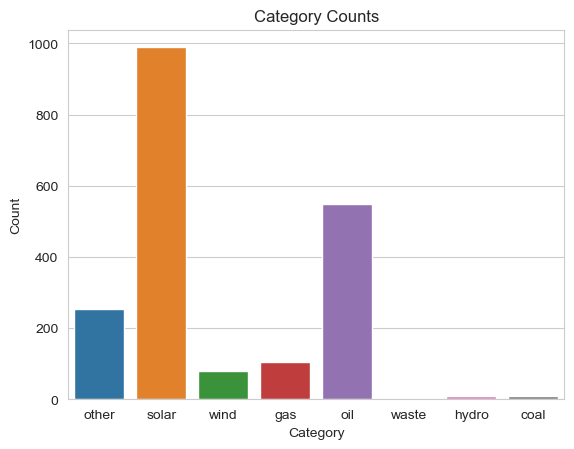

In [15]:
#create bar chart for categorical data
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set_style('whitegrid')

# Create a count plot of the categorical variable
# sns.countplot(x='energy_source_code_1', data=df)
sns.countplot(x='fuel_type_code_pudl', data=df)

# Set the title and axis labels
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')

# Display the plot
plt.show()

In [ ]:
query_columns = ['plant_id_eia', 'plant_name_eia', 'generator_id', 'technology_description', 
       'capacity_mw', 'state', 'city', 'county', 'operating_date', 'operational_status', 'operational_status_code', 
       'current_planned_operating_date','original_planned_operating_date', 'latitude', 'longitude', 
        'summer_capacity_mw', 'winter_capacity_mw', 'zip_code', 'utility_id_eia', 
        'utility_name_eia']
df[query_columns].head()

In [3]:
power_genome_sql = '/Users/kamrantehranchi/Downloads/pudl-2.sqlite'
import sqlalchemy as sa
pudl_engine = sa.create_engine('sqlite:////Users/kamrantehranchi/Downloads/pudl-2.sqlite')



In [5]:
insp = sa.inspect(pudl_engine)
print(insp.get_table_names())

['balancing_authorities_eia', 'boiler_fuel_eia923', 'boiler_generator_assn_eia860', 'boiler_generator_assn_types_eia', 'boilers_entity_eia', 'coalmine_eia923', 'coalmine_types_eia', 'contract_types_eia', 'data_maturities', 'energy_sources_eia', 'epacamd_eia', 'ferc_accounts', 'ferc_depreciation_lines', 'fuel_ferc1', 'fuel_receipts_costs_aggs_eia', 'fuel_receipts_costs_eia923', 'fuel_transportation_modes_eia', 'fuel_types_aer_eia', 'generation_eia923', 'generation_fuel_eia923', 'generation_fuel_nuclear_eia923', 'generators_eia860', 'generators_entity_eia', 'momentary_interruptions_eia', 'operational_status_eia', 'ownership_eia860', 'plant_in_service_ferc1', 'plants_eia', 'plants_eia860', 'plants_entity_eia', 'plants_ferc1', 'plants_hydro_ferc1', 'plants_pudl', 'plants_pumped_storage_ferc1', 'plants_small_ferc1', 'plants_steam_ferc1', 'political_subdivisions', 'power_purchase_types_ferc1', 'prime_movers_eia', 'purchased_power_ferc1', 'reporting_frequencies_eia', 'sector_consolidated_eia'

# Gabriels Code

In [ ]:
import copy
pd.set_option('display.min_rows', None)

#we keep only the relevant columns
pudl_df = copy.copy(pudl_out.gens_eia860()[['plant_id_eia', 'plant_name_eia', 'generator_id', 'technology_description', 'capacity_mw', 'state', 'city', 'county', 'operating_date', 'operational_status', 'operational_status_code', 'current_planned_operating_date','original_planned_operating_date', 'latitude', 'longitude',  'summer_capacity_mw', 'winter_capacity_mw', 'zip_code', 'plant_id_pudl', 'utility_id_eia', 'utility_id_pudl', 'utility_name_eia']])

In [ ]:
# We only keep the states that are part of the WECC. We choose not to include Texas and treat these manually since there's 2000 of them and only 16 to be matched in ADS dataset
#Note: pudl_df doesnt include data for Mexico nor Alberta nor British Columbia

pudl_df = pudl_df[pudl_df['state'].isin(['NM', 'AZ', 'CA', 'WA', 'OR', 'ID', 'WY', 'MT', 'UT', 'SD', 'CO', 'NV', 'NE', '0'])]

#we delete the duplicated rows
pudl_df = pudl_df.drop_duplicates(subset=['plant_id_pudl', 'plant_name_eia', 'generator_id'], keep='first')


pudl_df['operating_date'] = pd.to_datetime(pudl_df['operating_date'])

pudl_df['plant_name_eia'] = pudl_df['plant_name_eia'].str.replace(" ", "")
pudl_df['plant_name_eia'] = pudl_df['plant_name_eia'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x).lower())

pudl_df['technology_description'] = pudl_df['technology_description'].fillna('NA')
pudl_df['technology_description'] = pudl_df['technology_description'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x).lower())

print(pudl_df)

We make sure that all the rows corresponding to the same plant have their latitude and longitude features properly filled up if at least one of them is properly filled up

In [ ]:
pudl_match_gps = {}

for _, row in pudl_df.iterrows():
    idnum=row['plant_id_eia']
    lat = row['latitude']
    long = row['longitude']

    if (idnum not in pudl_match_gps) and (pd.isna(lat) == False and pd.isna(long) == False):
        pudl_match_gps.update({idnum: (lat, long)})

for index, row in pudl_df.iterrows():
    idnum=row['plant_id_eia']
    lat = row['latitude']
    long = row['longitude']

    if (pd.isna(lat) or pd.isna(long)) and (idnum in pudl_match_gps):
        pudl_df.at[index, 'latitude'] = lat
        pudl_df.at[index, 'longitude'] = long

print(pudl_df[['latitude', 'longitude']])


# initialize ads

In [ ]:
ads= pd.read_csv('/Users/jakobcourbat/Documents/Research/2032_ADS/GeneratorList.csv')

# we don't include AB, BC, or MX as they don't appear in pudl

ads = ads[ads['State'].isin(['NM', 'AZ', 'CA', 'WA', 'OR', 'ID', 'WY', 'MT', 'UT', 'SD', 'CO', 'NV', 'NE', '0', 'TX'])]

ads['Long Name'] = ads['Long Name'].astype(str)

ads['Commission Date'] = pd.to_datetime(ads['Commission Date'], format='#%Y-%m-%d#')

ads['Name'] = ads['Name'].str.replace(" ", "")
ads['Name'] = ads['Name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x).lower())

ads['Long Name'] = ads['Long Name'].str.replace(" ", "")
ads['Long Name'] = ads['Long Name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x).lower())


ads['SubType'] = ads['SubType'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x).lower())


print(ads)

# normalize technology type in SimpleType

In [ ]:
pudl_df['SimpleType'] = ''
pudl_df.loc[pudl_df['technology_description'].str.contains('hydro'), 'SimpleType'] = 'Hydro'
pudl_df.loc[pudl_df['technology_description'].str.contains('solarphotovoltaic'), 'SimpleType'] = 'SolarPV'
pudl_df.loc[pudl_df['technology_description'].str.contains('coal'), 'SimpleType'] = 'Coal'
pudl_df.loc[pudl_df['technology_description'].str.contains('naturalgas'), 'SimpleType'] = 'Natural Gas'
pudl_df.loc[pudl_df['technology_description'].str.contains('wind'), 'SimpleType'] = 'Wind'
pudl_df.loc[pudl_df['technology_description'].str.contains('petroleum'), 'SimpleType'] = 'Oil'
pudl_df.loc[pudl_df['technology_description'].str.contains('solarthermal'), 'SimpleType'] = 'Solar Thermal'
pudl_df.loc[pudl_df['technology_description'].str.contains('waste|landfill'), 'SimpleType'] = 'Biomass'
pudl_df.loc[pudl_df['technology_description'].str.contains('allother|flywheel|othergases'), 'SimpleType'] = 'Other'
pudl_df.loc[pudl_df['technology_description'] == 'na', 'SimpleType'] = 'Other'
pudl_df.loc[pudl_df['technology_description'].str.contains('batteries'), 'SimpleType'] = 'Batteries'
pudl_df.loc[pudl_df['technology_description'].str.contains('geothermal'), 'SimpleType'] = 'Geothermal'
pudl_df.loc[pudl_df['technology_description'].str.contains('nuclear'), 'SimpleType'] = 'Nuclear'


ads['SimpleType'] = ''
ads.loc[ads['SubType'].str.contains('battery'), 'SimpleType'] = 'Batteries'
ads.loc[ads['SubType'].str.contains('natgas'), 'SimpleType'] = 'Natural Gas'
ads.loc[ads['SubType'].str.contains('hydro'), 'SimpleType'] = 'Hydro'
ads.loc[ads['SubType'].str.contains('solarthermal'), 'SimpleType'] = 'Solar Thermal'
ads.loc[ads['SubType'].str.contains('solarpv'), 'SimpleType'] = 'SolarPV'
ads.loc[ads['SubType'].str.contains('nuclear'), 'SimpleType'] = 'nuclear'
ads.loc[ads['SubType'].str.contains('coal'), 'SimpleType'] = 'Coal'
ads.loc[ads['SubType'].str.contains('onshore'), 'SimpleType'] = 'Wind'
ads.loc[ads['SubType'].str.contains('geo'), 'SimpleType'] = 'Geothermal'
ads.loc[ads['SubType'].str.contains('bioct|wasteheat|dcintertie|ccabcogen|biocc|ctaero|ccpartsteam|vardevice|unknown|bioice|biost|ctabcogen|dgbtm|motorload|stother'), 'SimpleType'] = 'Other'
ads.loc[ads['SubType'] == 'dr', 'SimpleType'] = 'Other'
ads.loc[ads['SubType'].str.contains('oil'), 'SimpleType'] = 'Oil'

In [ ]:
print(ads[['SubType', 'SimpleType']])

# merge on IDs from 'Long ID'

In [ ]:
import re

merged_id = pd.DataFrame()
i=0
for index, ads_row in ads.iterrows():
    long_id = ads_row['Long ID']
    if isinstance(long_id, str):
        long_id_list = re.findall(r'\d+', long_id)
        if len(long_id_list) > 0:
            long_id_numbers = max(long_id_list, key = len)
            long_id_numbers = pd.Series(long_id_numbers).astype(pd.Int64Dtype()).iloc[0]
            if long_id_numbers > 33:
                pudl_row = pudl_df[pudl_df['plant_id_eia'] == long_id_numbers]
                if len(pudl_row) > 0:
                    pudl_row = pudl_row.iloc[0]
                    merged_row = pd.concat([ads_row, pudl_row], axis=0)
                    merged_id = merged_id.append(merged_row, ignore_index=True)
        

In [ ]:
print(merged_id[['GeneratorKey', 'Name', 'plant_name_eia', 'Long ID', 'plant_id_eia', 'generator_id', 'SubType', 'technology_description', 'MaxCap(MW)', 'capacity_mw', 'State', 'state', 'City', 'city', 'County', 'county', 'DevStatus', 'operational_status', 'Commission Date', 'operating_date' ]])
merged_id[['GeneratorKey', 'Name', 'plant_name_eia', 'Long ID', 'plant_id_eia', 'generator_id', 'SubType', 'technology_description', 'MaxCap(MW)', 
        'capacity_mw', 'State', 'state', 'City', 'city', 'County', 'county', 'DevStatus', 'operational_status', 'Commission Date', 'operating_date' ]].to_csv('merged_id.csv', index=False)


# initiate merged_total df that gathers all the matches

In [ ]:
merged_total_A = merged_id.copy()
merged_total_A['merged_type'] = 'Long_ID'
print(merged_total_A)

# merged_exact on exact names

In [ ]:
ads_exact = ads[~ads['GeneratorKey'].isin(merged_total_A['GeneratorKey'])].copy()
pudl_exact = pudl_df[~pudl_df['plant_id_eia'].isin(merged_total_A['plant_id_eia'])].copy()

merged_exact = pd.merge(ads_exact, pudl_exact, left_on=['Name'], right_on=['plant_name_eia'], how='inner')
merged_exact = merged_exact.drop_duplicates(subset=['GeneratorKey'])
print(merged_exact[['GeneratorKey', 'Name', 'plant_name_eia', 'generator_id', 'Long ID', 'plant_id_eia', 'SubType', 'technology_description', 'MaxCap(MW)', 'capacity_mw', 'State', 'state', 'City', 'city', 'County', 'county', 'DevStatus', 'operational_status', 'Commission Date', 'operating_date' ]])
merged_exact[['GeneratorKey', 'Name', 'plant_name_eia', 'generator_id', 'Long ID', 'plant_id_eia', 'SubType', 'technology_description', 'MaxCap(MW)', 
        'capacity_mw', 'State', 'state', 'City', 'city', 'County', 'county', 'DevStatus', 'operational_status', 'Commission Date', 'operating_date' ]].to_csv('merged_exact.csv', index=False)

print('count rows:', len(merged_exact['Name']))

update merged_total with the new matches

In [ ]:
merged_exact['merged_type'] = 'Exact Name'
merged_total_B = pd.concat([merged_total_A[['GeneratorKey', 'Name', 'plant_name_eia', 'Long ID', 'plant_id_eia', 'Long Name', 'generator_id', 'MaxCap(MW)', 'capacity_mw', 'SubType', 'technology_description', 'latitude', 'longitude', 'Commission Date', 'operating_date', 'State', 'state', 'County', 'county', 'City', 'city', 'Zipcode', 'zip_code', 'DevStatus', 'operational_status_code', 'Area Name', 'Region Name', 'summer_capacity_mw', 'winter_capacity_mw', 'merged_type']],
                           merged_exact[['GeneratorKey', 'Name', 'plant_name_eia', 'Long ID', 'plant_id_eia', 'Long Name', 'generator_id', 'MaxCap(MW)', 'capacity_mw', 'SubType', 'technology_description', 'latitude', 'longitude', 'Commission Date', 'operating_date', 'State', 'state', 'County', 'county', 'City', 'city', 'Zipcode', 'zip_code', 'DevStatus', 'operational_status_code', 'Area Name', 'Region Name', 'summer_capacity_mw', 'winter_capacity_mw', 'merged_type']]], axis = 0)
print(merged_total_B)
print('count rows:', len(merged_total_B['Name']))

update merged_total with the new matches

In [ ]:
manual_matches_idx= [(17784, 64103),
(15266, 60308),
(15262, 60307),
(5684, 50748),
(5698, 57564),
(15899, 55514),
(15900, 55514),
(15901,55200),
(15902,55200),
(703, 56474),
(17272, 55278),
(4620, 10649),
(2363, 8073),
(15905, 8073),
(15906, 8073),
(15907, 8073),
(15908,55295),
(15909,55295),
(2210,8022),
(2211,8022),
(2212,8022),
(2213,8022),
(2214,8022),
(2215,8022),
(10995,59002),
(10996,59002),
(10997,59002),
(10998,59002),
(10999,59002),
(6131, 10169),
(10559, 58503),
(15918, 55662),
(15919, 55662),
(13986, 57703),
(13987, 57703),
(13451, 2322),
(13452, 2322),
(13453, 2322),
(13454, 2322),
(13455, 2322),
(13456, 2322),
(13457, 2322),
(13458, 2322),
(13459, 2322),
(13460, 2322),
(13461, 2322),
(13462, 2322),
(14131, 2322),
(13710, 2336),
(13711, 2336),
(6328, 56356),
(18423, 7725),
(18424, 57015),
(15926, 56532),
(15927, 56532),
(15930, 56102),
(15931, 56102),
(15426, 52104),
(15934, 55333),
(15935, 55333),
(15936, 55333),
(13528, 389),
(15941, 389),
(15942, 389),
(17247, 389),
(15943, 55400),
(15944, 55400),
(18426, 57902),
(18427, 58687),
(18428, 64505),
(9918, 10342),
(15950, 56476),
(15951, 56476),
(15952, 59338),
(15953, 59338),
(15954, 60768),
(15955, 60768),
(15956, 59784),
(15957, 59784),
(15958, 59784),
(15959, 59784),
(4656, 55810),
(4657, 55810),
(4658, 55810),
(6930, 10034),
(17903, 54749),
(6953, 55482),
(15960, 7999),
(15961, 7999),
(15962, 55124),
(15963, 55124),
(7070, 55372),
(7072, 55372),
(7074, 55372),
(13594, 400),
(15974, 55518),
(15975, 55518),
(15976, 55518),
(13392, 126),
(13393, 126),
(18430, 56899),
(3463, 8066),
(3462, 8066),
(3461, 8066),
(3391, 8066),
(1324, 50494),
(7376, 50494),
(2168, 550),
(18432, 6518),
(15985, 55103),
(15986, 55103),
(15987, 56237),
(15988, 56237),
(15989, 56237),
(15990, 56237)]
print(manual_matches_idx[3])

merged_manual = pd.DataFrame()

for (ads_id, eia_id) in manual_matches_idx:
    row_ads = ads.loc[ads['GeneratorKey'] == ads_id]
    row_pudl = pudl_df.loc[pudl_df['plant_id_eia'] == eia_id]
    merged_row = pd.merge(row_ads, row_pudl, how='inner')
    merged_manual = merged_manual.append(merged_row, ignore_index=True)



In [ ]:
print(merged_manual[['GeneratorKey', 'Name', 'plant_name_eia', 'plant_id_eia', 'Long Name', 'generator_id', 'MaxCap(MW)', 'capacity_mw', 'SubType', 'technology_description', 'latitude', 'longitude', 'Commission Date', 'operating_date', 'State', 'state', 'County', 'county', 'City', 'city', 'Zipcode', 'zip_code', 'DevStatus', 'operational_status_code', 'Area Name', 'Region Name', 'summer_capacity_mw', 'winter_capacity_mw']])
merged_manual[['GeneratorKey', 'Name', 'plant_name_eia', 'plant_id_eia', 'Long Name', 'generator_id', 'MaxCap(MW)', 'capacity_mw', 'SubType', 'technology_description', 'latitude', 'longitude', 'Commission Date', 'operating_date', 'State', 'state', 'County', 'county', 'City', 'city', 'Zipcode', 'zip_code', 'DevStatus', 'operational_status_code', 'Area Name', 'Region Name', 'summer_capacity_mw', 'winter_capacity_mw']].to_csv('merged_manual.csv', index=False)

